<a href="https://colab.research.google.com/github/PoojaDoctor/Data144-FinalProject/blob/master/Lily_Data_144_Final_Proj_v2_Nov_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data 144 Final Project Exploration -- Lily Li -- Version 2**

Recommend Methods:
1. Random forest
2. Decision tree
3. Neural network
4. Linear Regression

Try different models and throw the data into them!

### **Ted Main Dataset**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Upload the "Ted Main" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/ted_main.csv'
df_ted = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df_ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
df_ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [5]:
df_ted[['views','comments']] 

,views,comments
0,47227110,4553
1,3200520,265
2,1636292,124
3,1697550,200
4,12005869,593
...,...,...
2545,450430,17
2546,417470,6
2547,375647,10
2548,419309,32


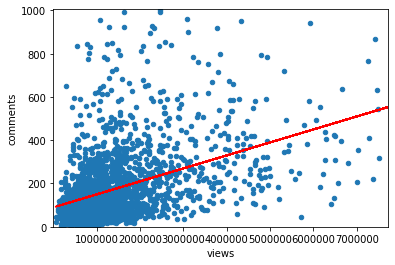

In [9]:
# Because comments and views have strong correlation:
from sklearn.linear_model import LinearRegression

data = df_ted[['views','comments']]  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
data.plot.scatter(x='views', y='comments', xlim=(1,7.722711e+06), ylim=(0,1004))
plt.plot(X, Y_pred, color='red')
plt.show()

#var = 'views'
#data = pd.concat([df_ted['comments'], df_ted[var]], axis=1)
#data.plot.scatter(x=var, y='comments', xlim=(1,8.722711e+06), ylim=(0,1004));

In [0]:
# How to use number of comments to predict views



In [0]:
# Now, the next goal is to use the number of comments to predict views.

In [0]:
df_ted.shape

In [0]:
df_ted.columns

In [0]:
df_ted.describe()

In [0]:
# Finding the null values
print(df_ted.isnull().sum())

In [0]:
# Identify the null values rolls
no_speaker_occ = df_ted[df_ted["speaker_occupation"].isnull()]
no_speaker_occ

In [0]:
df_ted['views'].describe()

In [0]:
no_speaker_occ['views'].describe()

In [0]:
# Finding:
# Becuase the average views for ted talks that speakers' have no occupations is samller than the average views.
# I want to learn more about the relationship between occupations & views.

In [0]:
df_ted['speaker_occupation'].describe()

In [0]:
print('The most popular occupation for speakers is Writer.')
# later, in the graphing area, I will explore more about how different occupations are related to views.

In [0]:
# How many unique occupations?
print('NUMBER OF UNIQUE OCCUPATIONS')
print(len(df_ted['speaker_occupation'].unique()))

In [0]:
# How many unique speakers?
print('NUMBER OF UNIQUE SPEAKERS')
print(len(df_ted['main_speaker'].unique()))

In [0]:
# How many unique event?
print('NUMBER OF UNIQUE EVENT')
print(len(df_ted['event'].unique()))

In [0]:
# histogram
# to learn about how do views distribute
sns.distplot(df_ted['views']);

Relationship with numerical variables

scatter plot comments/views

In [0]:
# is the the number of comments related to the popularity?

var = 'comments'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,400), ylim=(0,7000000));


scatter plot languages/views

In [0]:
# is the the number of language available related to the popularity?

var = 'languages'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,51), ylim=(0,7000000));


scatter plot num_speaker/views

In [0]:
# is the the number of speakers related to the popularity?

var = 'num_speaker'
data = pd.concat([df_ted['views'], df_ted[var]], axis=1)
data.plot.scatter(x=var, y='views', xlim=(1,5), ylim=(0,7000000));


Relationship with categorical features

In [0]:
# box plot views/speaker_occupation
# is the the speaker occupation related to the popularity?

var = 'views'
data = pd.concat([df_ted['speaker_occupation'], df_ted[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="speaker_occupation", data=data)
fig.axis(ymin=0, xmax=2e+07, ymax = 10);

In [0]:
no_speaker_occ['views'].describe()

In [0]:
df_ted[df_ted['main_speaker'] == 'Hans Rosling']

In [0]:
# discovering patterns from the most popular speaker, Hans Rosling

In [0]:
df_ted.groupby('event').sum()

In [0]:
df_ted['event'].describe()

In [0]:
# box plot views/speaker_occupation
var = 'views'
data = pd.concat([df_ted['event'], df_ted[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="event", data=data)
fig.axis(ymin=0, xmax=8000000, ymax = 20);

In [0]:
#histogram and normal probability plot
sns.distplot(df_ted['views'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_ted['views'], plot=plt)

In [0]:
# Upload the "Cleanned" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/cleaned.csv'
df_cleanned = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df_cleanned.head(3)

# **RANDOM FOREST:**

In [0]:
#Import scikit-learn dataset library
from sklearn import datasets
data = df_cleanned

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['duration', 'languages','comments', 'month', 'Funny','Beautiful','Ingenious','Courageous','Longwinded',
        'Confusing','Informative','Fascinating','Unconvincing','Persuasive','Jaw-dropping','OK']]  # Features
y=data['views']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Accuracy with descriptive labels is Accuracy: 0.001349527665317139')

In [0]:
url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/cleaned.csv'
df_cleanned = pd.read_csv(url)

In [0]:
#Import scikit-learn dataset library
from sklearn import datasets
data = df_cleanned

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['duration', 'languages','comments', 'month', 'num_speaker']]  # Features
y=data['views']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('Accuracy without descriptive labels is Accuracy: 0.005398110661268556')

In [0]:
# Now you can predict approximate how many views it is.
# helpful link: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

Conclude Random Forest.

Explore: what will make the best accuracy?

# **DECISION TREE**

In [0]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [0]:
pima = pd.read_csv('https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/cleaned.csv')
pima.head()

In [0]:
#split dataset in features and target variable
feature_cols = ['duration', 'languages','comments','num_speaker', 'month']
X = pima[feature_cols] # Features
y = pima.views # Target variable

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('The accuracy of metrics in decision tree is higher, 0.006747638326585695, is higher than the random forest.')

In [0]:
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True, feature_names = feature_cols)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())

# Error: Program terminated with status: -9. stderr follows: dot: graph is too large for cairo-renderer bitmaps.
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python

# In Scikit-learn, optimization of decision tree classifier

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print('The accuracy with scikit-learn does not help to optimize the accuracy')

# **Neural Network**

In [3]:
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize

!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 

import pandas as pd
import numpy as np 
import gensim

--2019-11-23 01:45:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.8.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.8.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  35.5MB/s    in 45s     

2019-11-23 01:46:16 (34.6 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [5]:
word_vectors = model.wv
word_vectors.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf84a8>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8588>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf85f8>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8668>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf86d8>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8748>,
 '##': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf87b8>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8828>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8898>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8908>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8978>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf89e8>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8a58>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8ac8>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8b38>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7f2f5acf8ba8>,
 'be': <gen

In [13]:
# Upload the "Cleanned" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/cleaned.csv'
df_cleanned = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df_cleanned.head(3)

,Unnamed: 0,comments,description,duration,languages,main_speaker,name,num_speaker,related_talks,speaker_occupation,tags,title,url,views,transcript,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,max_rating,yr,month
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,Inspiring,2006,6
1,1,265,With the same humor and humanity he exuded in ...,977,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",544,58,56,139,113,62,443,132,258,268,116,203,131,413,Funny,2006,6
2,2,124,New York Times columnist David Pogue takes aim...,1286,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",964,60,183,45,78,27,395,166,104,230,54,146,142,230,Funny,2006,6


# **LINEAR REGRESSION**

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
# Upload the "Cleanned" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/cleaned.csv'
dataset = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
dataset.shape

(2467, 32)

In [11]:
dataset.describe()

,Unnamed: 0,comments,duration,languages,num_speaker,views,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,yr,month
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2.467000e+03,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,1290.604783,193.425213,822.725578,28.310093,1.027969,1.747192e+06,157.035671,192.576814,152.175517,168.999595,32.922173,21.098500,354.209566,317.208756,53.531415,223.223754,148.400486,81.757195,25.818808,534.901094,2012.132550,6.337657
std,745.473521,285.304705,334.002254,8.234100,0.208371,2.533097e+06,598.778813,478.431012,286.539868,445.398923,41.922335,31.827247,546.221176,629.911244,92.849048,470.826345,559.881195,90.024732,53.270378,1298.578684,3.035853,3.350184
min,0.000000,2.000000,135.000000,1.000000,1.000000,1.558950e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2006.000000,1.000000
25%,641.500000,63.000000,584.000000,23.000000,1.000000,7.891885e+05,8.000000,26.000000,26.000000,20.000000,9.000000,5.000000,102.500000,80.000000,12.000000,38.000000,18.000000,32.000000,6.000000,114.000000,2010.000000,4.000000
50%,1315.000000,118.000000,853.000000,28.000000,1.000000,1.149090e+06,21.000000,68.000000,70.000000,53.000000,19.000000,12.000000,217.000000,163.000000,27.000000,98.000000,42.000000,56.000000,13.000000,236.000000,2012.000000,6.000000
75%,1938.500000,224.000000,1048.000000,33.000000,1.000000,1.739450e+06,91.000000,187.500000,172.000000,150.000000,41.000000,24.000000,410.000000,346.500000,60.000000,231.500000,110.500000,100.000000,27.000000,502.000000,2015.000000,9.000000
max,2558.000000,6404.000000,3608.000000,72.000000,5.000000,4.722711e+07,19645.000000,9437.000000,6073.000000,8668.000000,447.000000,531.000000,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000,2017.000000,12.000000


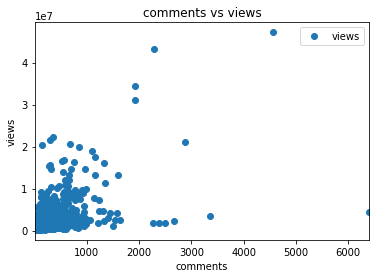

In [13]:
dataset.plot(x='comments', y='views', style='o')  
plt.title('comments vs views')  
plt.xlabel('comments')  
plt.ylabel('views')  
plt.show()

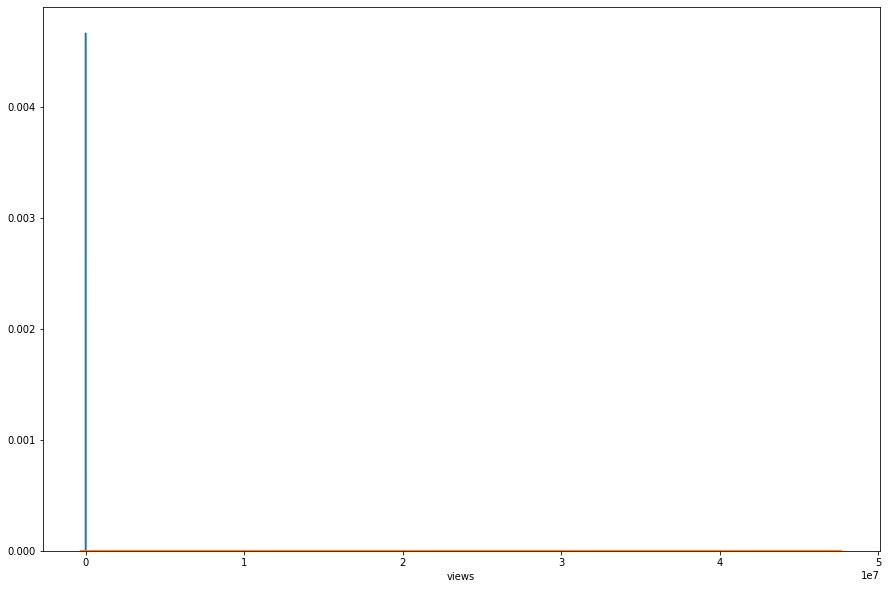

In [26]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['comments'])
seabornInstance.distplot(dataset['views'])

In [0]:
X = dataset['comments'].values.reshape(-1,1)
y = dataset['views'].values.reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[811099.47110646]
[[4921.41552533]]


In [22]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,415566,1.268791e+06
1,1174189,4.679332e+06
2,2649262,1.219577e+06
3,816019,2.262917e+06
4,1778739,1.362298e+06
...,...,...
489,862238,9.981133e+05
490,3404977,1.258948e+06
491,711977,1.726483e+06
492,1405468,1.027642e+06


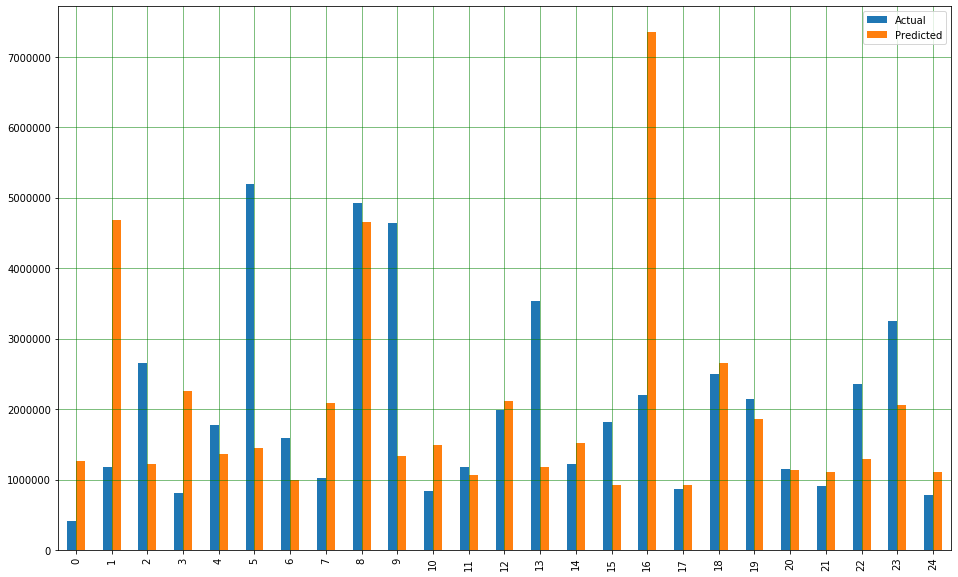

In [23]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

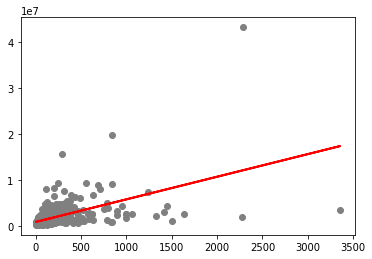

In [24]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [0]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

Transcript:

In [0]:
# Upload the "Transcript" dataset

url = 'https://raw.githubusercontent.com/PoojaDoctor/Data144-FinalProject/master/datasets/transcripts.csv'
df_trans = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [0]:
df_trans.head(3)